In [1]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import logging
logging.getLogger('lightgbm').setLevel(logging.INFO)
logging.getLogger('lightgbm').setLevel(logging.ERROR)

c:\Users\afias\anaconda3\envs\dev\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(Path('winequality-red.csv'))
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# EDA - Exploratory Data Analysis

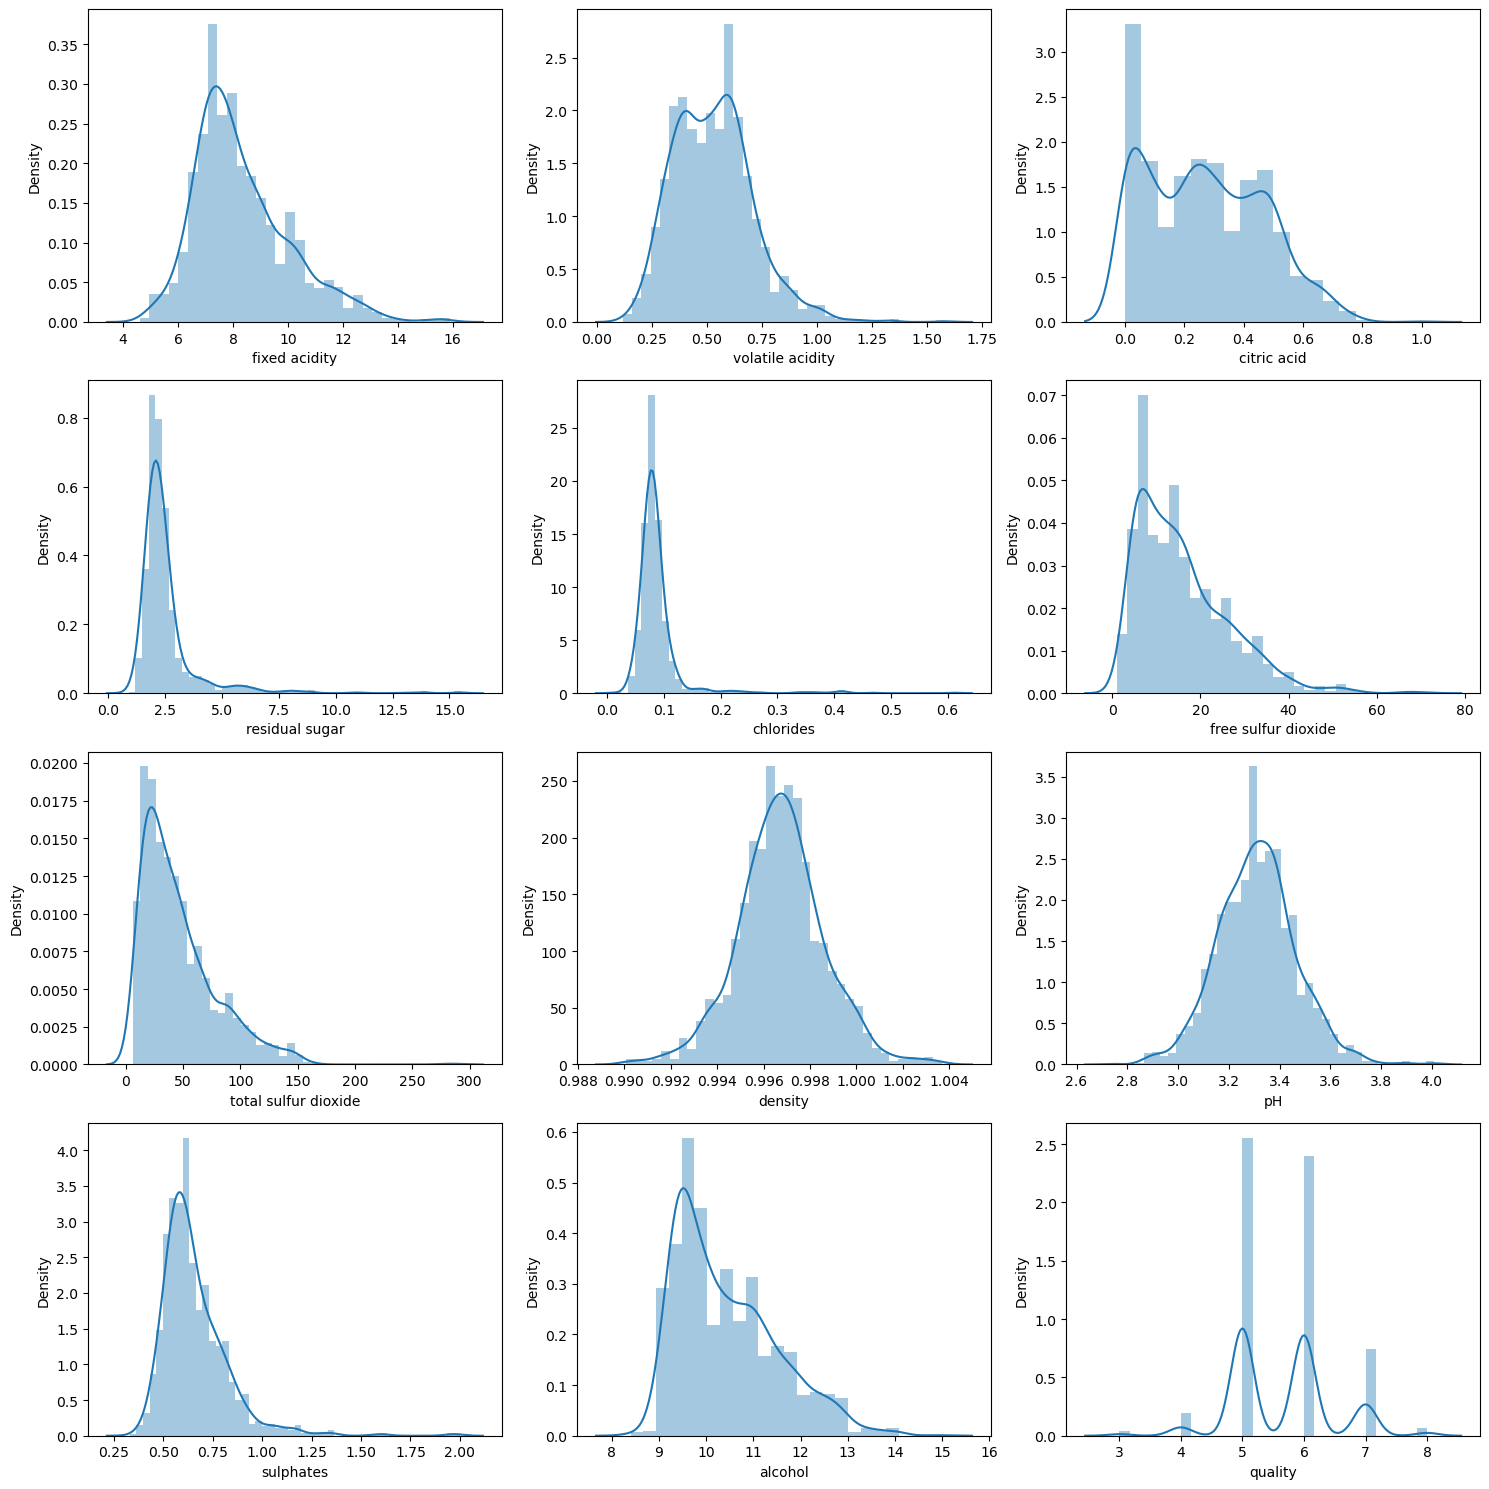

In [5]:
## Picturesque of columns
plt.figure(figsize=(15,15))
plotfig=1

for col in df:
    if plotfig<=12:
        ax=plt.subplot(4, 3, plotfig)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=10)
        
    plotfig+=1
    
plt.tight_layout()
plt.show()

<Axes: >

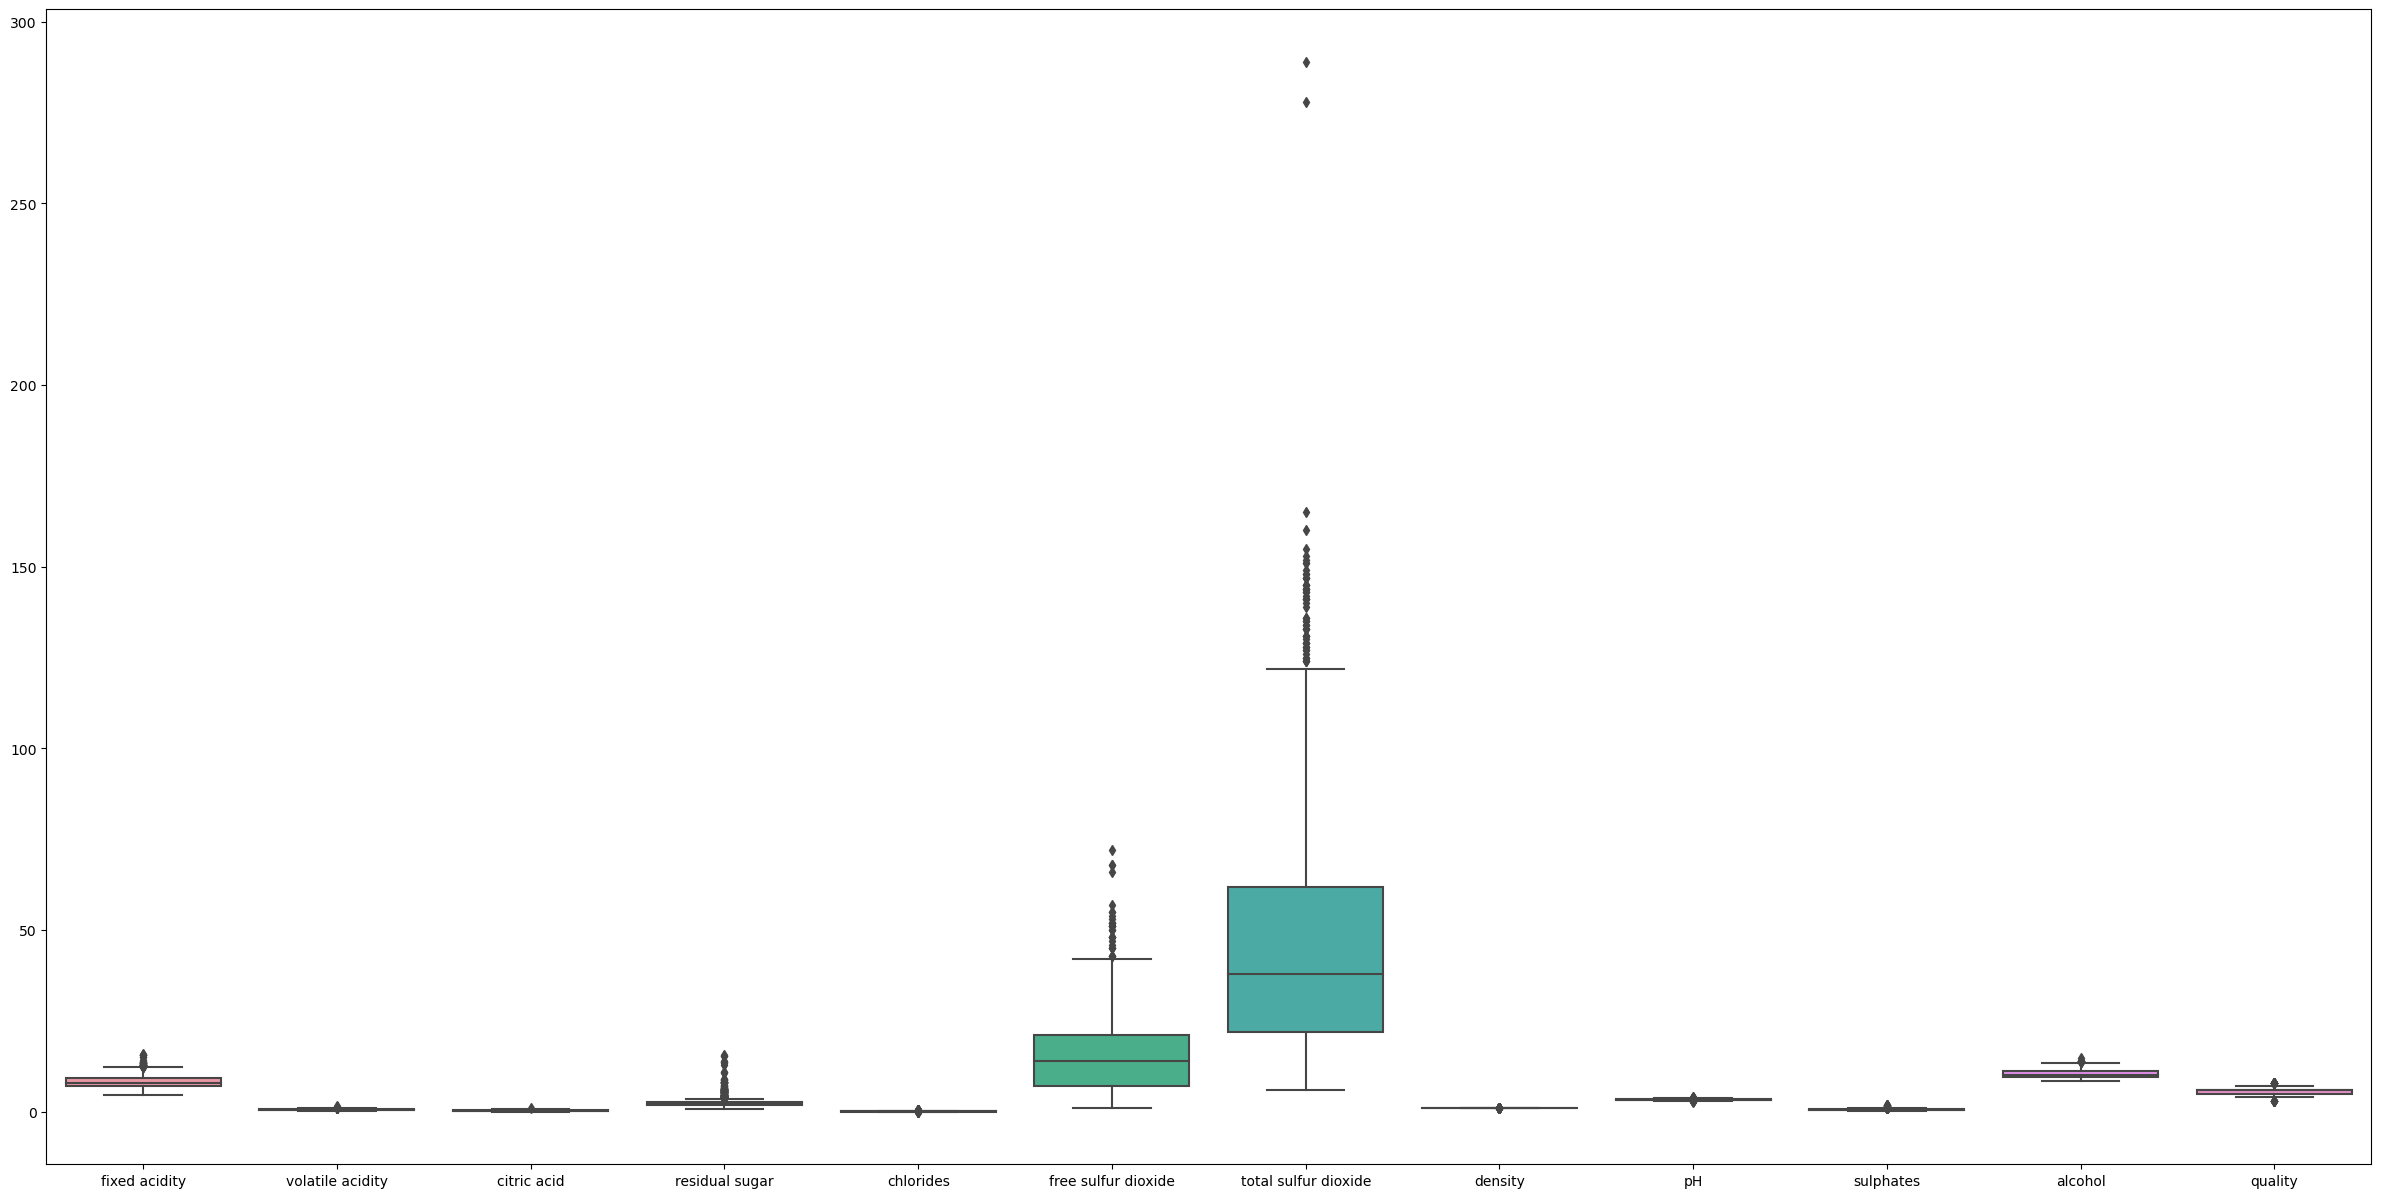

In [6]:
# boxplot for each columns
plt.figure(figsize=(30, 15))
sns.boxplot(data=df)

<Axes: >

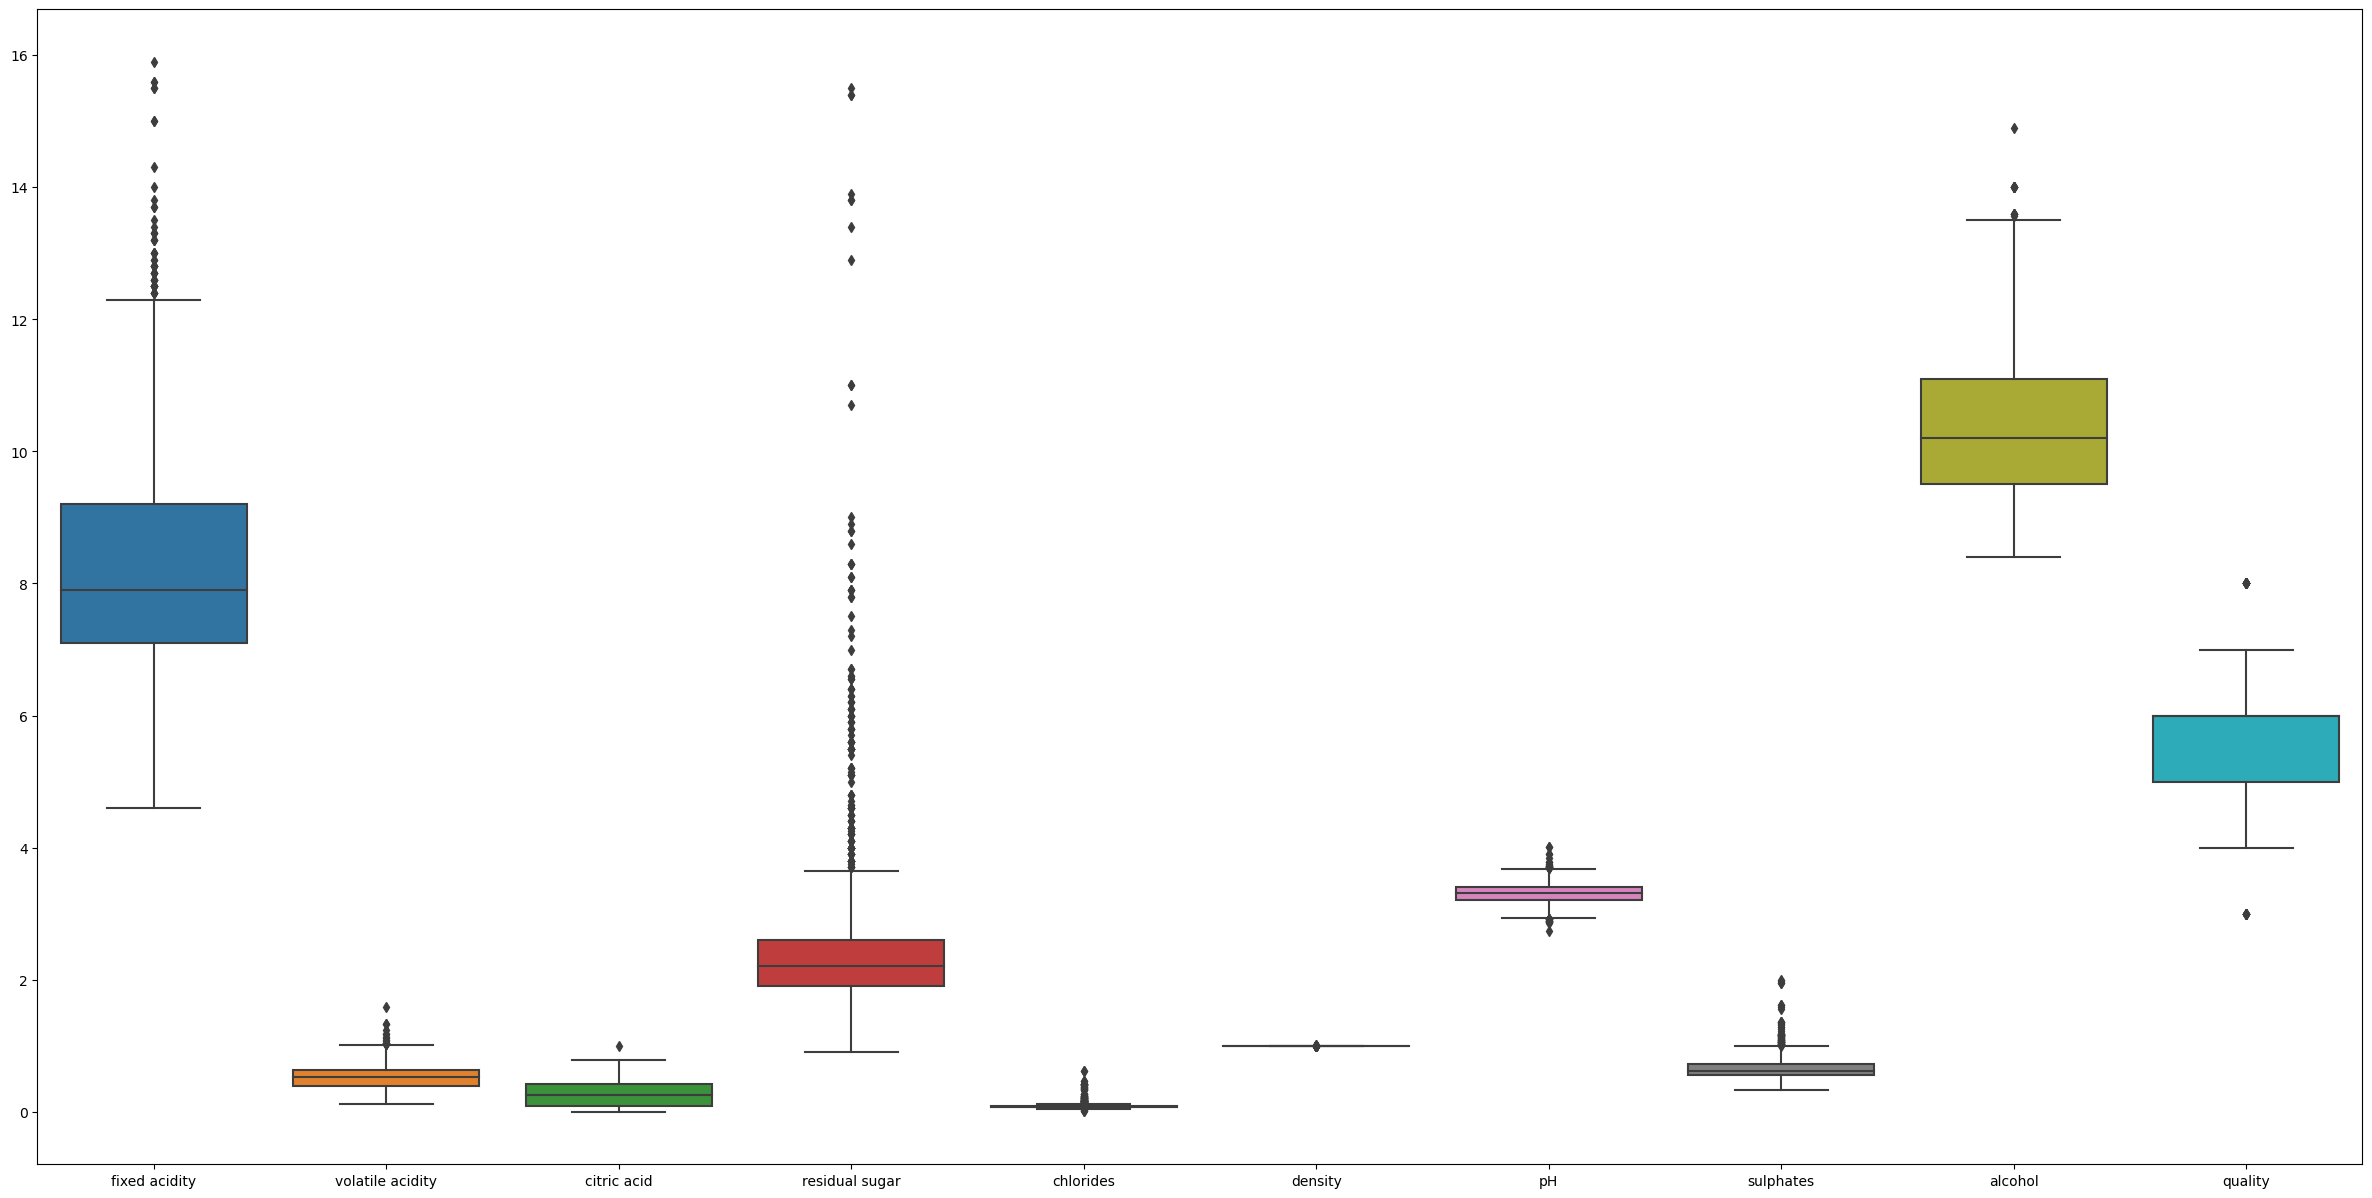

In [7]:
# zoom out some variables
plt.figure(figsize=(30, 15))
zoom = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]
sns.boxplot(data=zoom)

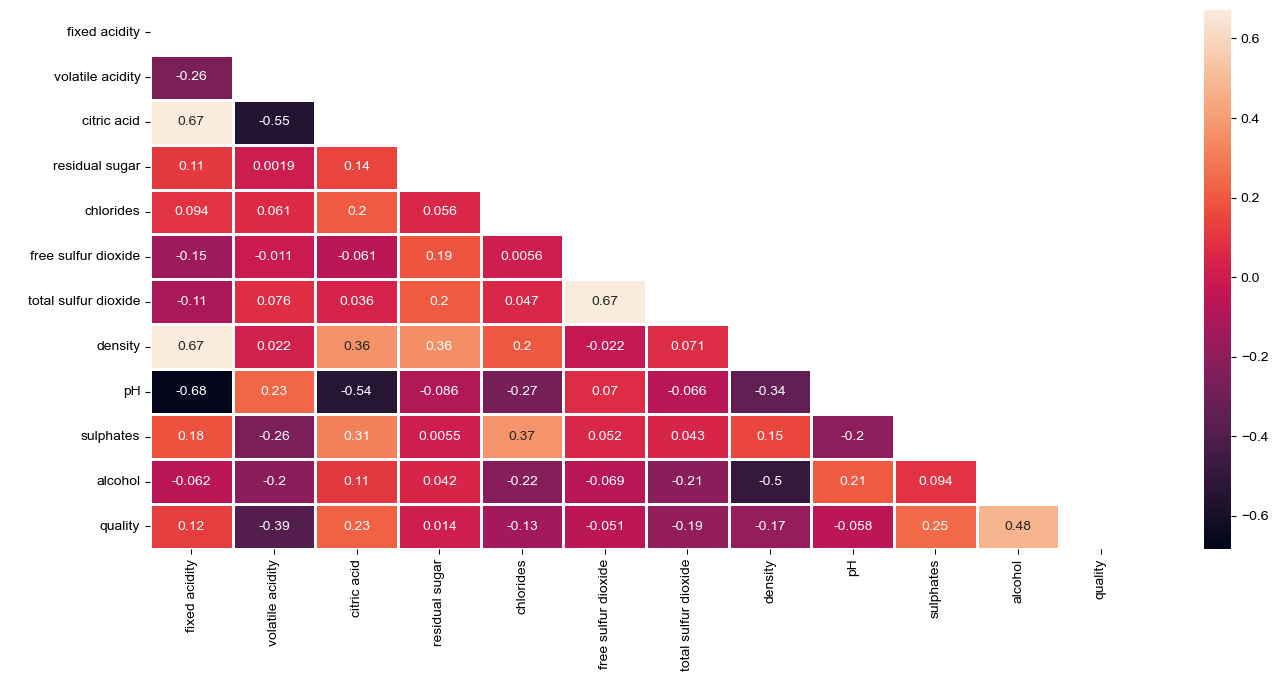

In [8]:
# Heatmap 
plt.figure(figsize=(16,7))

correlation=df.corr()
mask=np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask ,annot=True, fmt='0.2g', linewidth=1)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

In [9]:
## features(X values)
X = df.drop('quality', axis=1)

In [10]:
## target(y)
y = df.iloc[:, -1]

In [11]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [12]:
# View Shape of training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [13]:
# scale data
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
X_train_scaled = model.fit_transform(X_train)
X_test_scaled = model.transform(X_test)

# Implementing Machine Learning Models

In [14]:
# Instantiate Logistic regression
model = LogisticRegression(multi_class='multinomial')

In [15]:
# fit data
lr_model = model.fit(X_train_scaled, y_train)

In [16]:
# Make a prediction using the testing data
pred = model.predict(X_test_scaled)

pd.DataFrame(
    {
        'Prediction' : pred,
        'Actual': y_test
    }
)

,Prediction,Actual
1100,7,6
1586,6,6
324,5,6
923,6,6
183,5,5
...,...,...
1010,7,7
581,5,5
1054,5,6
678,5,5


# Logistic Reg Performance Metrics

In [17]:
# accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr_acc_score = accuracy_score(y_test, pred)
print(f'Training Accuracy Score: {accuracy_score(y_train, model.predict(X_train_scaled))}')
print(f'Testing Accuracy Score: {lr_acc_score}')

Training Accuracy Score: 0.609674728940784
Testing Accuracy Score: 0.575


In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.66      0.67      0.66       170
           6       0.52      0.61      0.56       160
           7       0.50      0.38      0.43        50
           8       0.00      0.00      0.00         5

    accuracy                           0.57       400
   macro avg       0.28      0.28      0.28       400
weighted avg       0.55      0.57      0.56       400



# KNeighborsClassifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [20]:
knn_pred = model.predict(X_test_scaled)

In [21]:
knn_acc_score = accuracy_score(y_test, knn_pred)
print(f'Training Accuracy Score: {accuracy_score(y_train, knn.predict(X_train_scaled))}')
print(f'Testing Accuracy Score: {knn_acc_score}')

Training Accuracy Score: 0.6872393661384487
Testing Accuracy Score: 0.575


In [22]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.66      0.67      0.66       170
           6       0.52      0.61      0.56       160
           7       0.50      0.38      0.43        50
           8       0.00      0.00      0.00         5

    accuracy                           0.57       400
   macro avg       0.28      0.28      0.28       400
weighted avg       0.55      0.57      0.56       400



# Support Vector Classification

In [23]:
# SVC
from sklearn.svm import SVC
mod = SVC()
svc_model = mod.fit(X_train_scaled, y_train)
svc_pred = mod.predict(X_test_scaled)

In [24]:
svc_acc_score = accuracy_score(y_test, svc_pred)
print(f'Training Accuracy Score: {accuracy_score(y_train, mod.predict(X_train_scaled))}')
print(f'Testing Accuracy Score: {svc_acc_score}')

Training Accuracy Score: 0.6872393661384487
Testing Accuracy Score: 0.605


In [25]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.67      0.71      0.69       170
           6       0.54      0.65      0.59       160
           7       0.64      0.36      0.46        50
           8       0.00      0.00      0.00         5

    accuracy                           0.60       400
   macro avg       0.31      0.29      0.29       400
weighted avg       0.58      0.60      0.59       400



# Stochastic Gradient Descent

In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [27]:
# best parameter and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l2'}
0.5754901960784313


In [28]:
sgd = SGDClassifier(alpha = 0.1, loss = 'log_loss', penalty = 'l2')
modd = sgd.fit(X_train_scaled, y_train)

y_pred = sgd.predict(X_test_scaled)

print(f'Training Accuracy Score: {accuracy_score(y_train, sgd.predict(X_train_scaled))}')

sgd_acc_score = accuracy_score(y_test, y_pred)
print(f'Testing Accuracy Score: {sgd_acc_score}')

Training Accuracy Score: 0.5921601334445371
Testing Accuracy Score: 0.5525


In [29]:
# Calssification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.62      0.74      0.67       170
           6       0.48      0.60      0.54       160
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         5

    accuracy                           0.55       400
   macro avg       0.18      0.22      0.20       400
weighted avg       0.46      0.55      0.50       400



# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
moddtc = dtc.fit(X_train_scaled, y_train)

In [31]:
# accuracy score
predtc = moddtc.predict(X_test_scaled)
dtc_acc_score = accuracy_score(y_test, predtc)
print(f"Training Accuracy Score: {accuracy_score(y_train, dtc.predict(X_train_scaled))}")
print(f"Testing Accuracy Score:{dtc_acc_score}")

Training Accuracy Score: 1.0
Testing Accuracy Score:0.6025


In [32]:
# Calssification Report
print(classification_report(y_test, predtc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.17      0.15      0.16        13
           5       0.73      0.63      0.68       170
           6       0.58      0.66      0.62       160
           7       0.49      0.50      0.50        50
           8       0.20      0.20      0.20         5

    accuracy                           0.60       400
   macro avg       0.36      0.36      0.36       400
weighted avg       0.61      0.60      0.60       400



# RandomForest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [34]:
rf_pred = rf.predict(X_test_scaled)
rf_acc_score = accuracy_score(y_test, rf_pred)
print(f"Training Accuracy Score: {accuracy_score(y_train, rf.predict(X_train_scaled))}")
print(f"Testing Accuracy Score: {rf_acc_score}")

Training Accuracy Score: 1.0
Testing Accuracy Score: 0.6525


In [35]:
# Calssification Report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.73      0.68      0.71       170
           6       0.59      0.74      0.66       160
           7       0.68      0.52      0.59        50
           8       0.50      0.20      0.29         5

    accuracy                           0.65       400
   macro avg       0.42      0.36      0.37       400
weighted avg       0.64      0.65      0.64       400



# Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [37]:
# print accuracy score
gb_pred = gb.predict(X_test_scaled)
gb_acc_score = accuracy_score(y_test, gb_pred)
print(f"Training Accuracy Score: {accuracy_score(y_train, gb.predict(X_train_scaled))}")
print(f'Testing Accuracy Score: {gb_acc_score}')

Training Accuracy Score: 0.9015846538782318
Testing Accuracy Score: 0.625


In [38]:
# Calssification Report
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.17      0.08      0.11        13
           5       0.71      0.69      0.70       170
           6       0.61      0.65      0.63       160
           7       0.50      0.52      0.51        50
           8       0.33      0.20      0.25         5

    accuracy                           0.62       400
   macro avg       0.39      0.36      0.37       400
weighted avg       0.62      0.62      0.62       400



# Light Gradient Boosting Machine Classifier

In [39]:
# Model. Fit. Predict
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train_scaled, y_train)
lgbm_predt = lgbm.predict(X_train_scaled)
lgbm_pred = lgbm.predict(X_test_scaled)
lgbm_acc_score = accuracy_score(y_test, lgbm_pred)
print(f'Training Accuracy Score: {accuracy_score(y_train,lgbm_predt)}')
print(f'Testing Accuracy Score: {lgbm_acc_score}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1001
[LightGBM] [Info] Number of data points in the train set: 1199, number of used features: 11
[LightGBM] [Info] Start training from score -5.009802
[LightGBM] [Info] Start training from score -3.400364
[LightGBM] [Info] Start training from score -0.852874
[LightGBM] [Info] Start training from score -0.919632
[LightGBM] [Info] Start training from score -2.085297
[LightGBM] [Info] Start training from score -4.524294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [40]:
# Calssification Report
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.08      0.13        13
           5       0.71      0.65      0.68       170
           6       0.59      0.71      0.65       160
           7       0.64      0.64      0.64        50
           8       1.00      0.20      0.33         5

    accuracy                           0.65       400
   macro avg       0.57      0.38      0.41       400
weighted avg       0.65      0.65      0.64       400



# CatBoost Classifier

In [41]:
# Model. Fit. Predict
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train_scaled, y_train)
cat_predt = lgbm.predict(X_train_scaled)
cat_pred = lgbm.predict(X_test_scaled)
cat_acc_score = accuracy_score(y_test, cat_pred)
print(f'Testing Accuracy Score: {cat_acc_score}')

Learning rate set to 0.079863
0:	learn: 1.6859813	total: 138ms	remaining: 2m 18s
1:	learn: 1.6034992	total: 148ms	remaining: 1m 13s
2:	learn: 1.5269831	total: 155ms	remaining: 51.5s
3:	learn: 1.4613037	total: 163ms	remaining: 40.6s
4:	learn: 1.4050697	total: 171ms	remaining: 34s
5:	learn: 1.3596489	total: 178ms	remaining: 29.5s
6:	learn: 1.3152092	total: 185ms	remaining: 26.2s
7:	learn: 1.2754276	total: 192ms	remaining: 23.8s
8:	learn: 1.2395212	total: 200ms	remaining: 22s
9:	learn: 1.2088302	total: 208ms	remaining: 20.6s
10:	learn: 1.1786917	total: 216ms	remaining: 19.4s
11:	learn: 1.1520520	total: 223ms	remaining: 18.4s
12:	learn: 1.1297122	total: 232ms	remaining: 17.6s
13:	learn: 1.1061230	total: 239ms	remaining: 16.8s
14:	learn: 1.0846883	total: 247ms	remaining: 16.2s
15:	learn: 1.0678572	total: 253ms	remaining: 15.5s
16:	learn: 1.0510680	total: 260ms	remaining: 15s
17:	learn: 1.0363565	total: 267ms	remaining: 14.6s
18:	learn: 1.0213027	total: 274ms	remaining: 14.2s
19:	learn: 1.00

In [42]:
# Calssification Report
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.08      0.13        13
           5       0.71      0.65      0.68       170
           6       0.59      0.71      0.65       160
           7       0.64      0.64      0.64        50
           8       1.00      0.20      0.33         5

    accuracy                           0.65       400
   macro avg       0.57      0.38      0.41       400
weighted avg       0.65      0.65      0.64       400



# XGBoost Classifier

In [43]:
# Import xgboost
import xgboost as xgb

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [45]:
# Use XgboostClassifier to fit model
model = xgb.XGBClassifier()
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

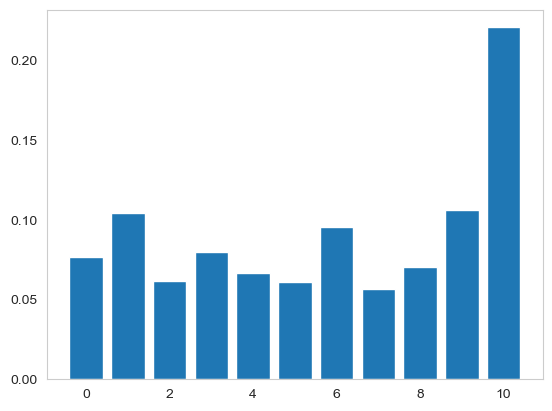

In [46]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [47]:
xgb_pred = model.predict(X_test_scaled)
xgb_acc_score = accuracy_score(y_test, xgb_pred)
print(f"Testing Accuracy Score: {xgb_acc_score}")

Testing Accuracy Score: 0.0025


In [48]:
# Calssification Report
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.01      0.50      0.01         2
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00       170
           6       0.00      0.00      0.00       160
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         5

    accuracy                           0.00       400
   macro avg       0.00      0.06      0.00       400
weighted avg       0.00      0.00      0.00       400



# Multi-Layer Preceptron Classification

In [49]:
# Import a new classifier from SKLearn, Multi-Layer Preceptron Classifier
from sklearn.neural_network import MLPClassifier

# Initiate the model instance
model = MLPClassifier(
    solver='sgd',
    alpha=1e-5,
    max_iter=1200,
    hidden_layer_sizes=(100, 60, 40)
)

In [50]:
# Fit the model using the training data
model = model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = model.predict(X_test_scaled)

# Review the model's predicted values
pred[:10]

array([4, 4, 3, 3, 2, 3, 3, 2, 3, 2], dtype=int64)

In [51]:
mlpc_acc_score = accuracy_score(y_test, pred)
print(f'Testing Accuracy Score: {mlpc_acc_score}')

Testing Accuracy Score: 0.0


In [52]:
# Calssification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       2.0
           4       0.00      0.00      0.00      13.0
           5       0.00      0.00      0.00     170.0
           6       0.00      0.00      0.00     160.0
           7       0.00      0.00      0.00      50.0
           8       0.00      0.00      0.00       5.0

    accuracy                           0.00     400.0
   macro avg       0.00      0.00      0.00     400.0
weighted avg       0.00      0.00      0.00     400.0



In [53]:
# models in dataframe
models = pd.DataFrame(
    {
        'Model' : ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'LGBM', 'Cat Boost', 'MLPClassifier'],
        'Score': [lr_acc_score, knn_acc_score, svc_acc_score, dtc_acc_score, rf_acc_score, gb_acc_score, lgbm_acc_score, cat_acc_score, mlpc_acc_score]
    }
)
models.sort_values(by = 'Score', ascending= False)

,Model,Score
4,Random Forest,0.6525
6,LGBM,0.6450
7,Cat Boost,0.6450
5,Gradient Boosting,0.6250
2,SVC,0.6050
3,Decision Tree,0.6025
0,Logistic Regression,0.5750
1,KNN,0.5750
8,MLPClassifier,0.0000


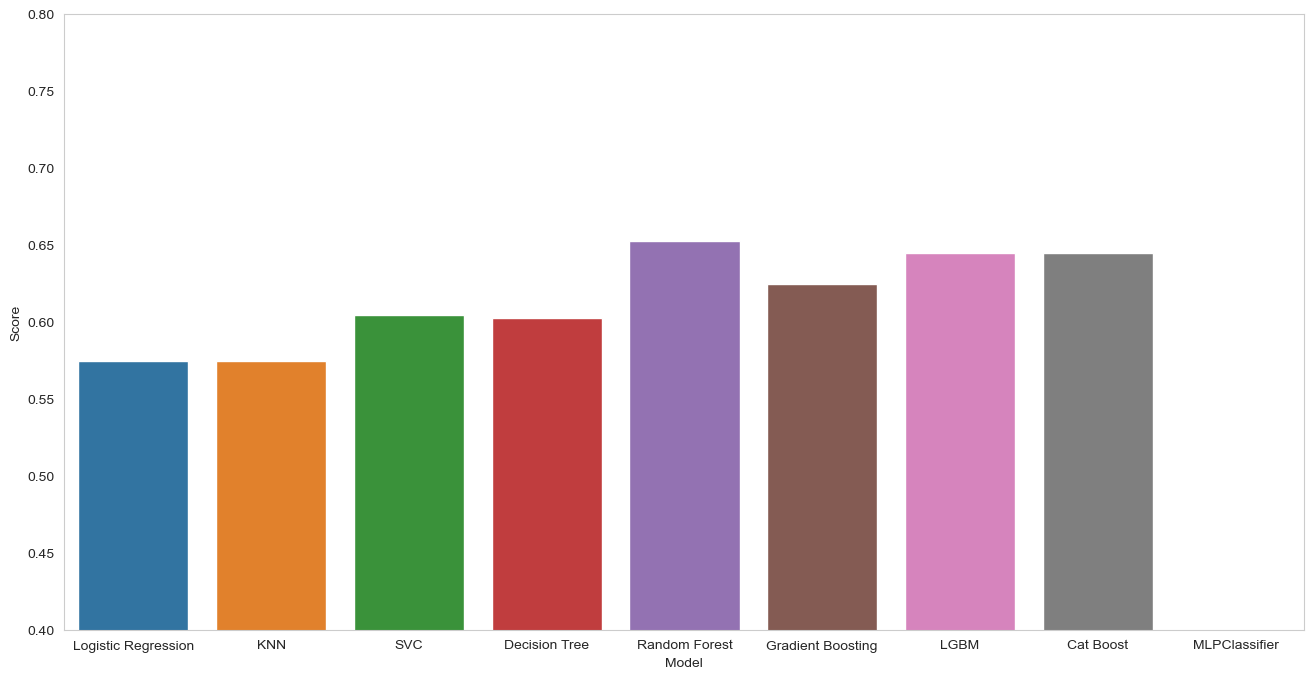

In [54]:
plt.figure(figsize = (16, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.40, 0.80)
plt.show()

In [55]:
import pickle

In [56]:
filename = 'rwine_quality.sav'
pickle.dump(lr_model, open(filename, 'wb'))